Question Problem
Objective: The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

Key Components to be fulfilled:

Data Exploration: Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns.

Data Cleaning:

1.Find the missing and inappropriate values, treat them appropriately. Remove all duplicate rows. Find the outliers.

2.Replace the value 0 in age as NaN

3.Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

Data Analysis:

1.Filter the data with age >40 and salary<5000

2.Plot the chart with age and salary

3.Count the number of people from each place and represent it visually

Data Encoding:

1.Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

Feature Scaling:

1.After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

Solution
Steps involved in Data preprocesing:

Step 1 : importing neccessary libraries

Step 2 : Read the dataset

Step 3 : Sanity check of data

Step 4 : Exploratory Data Analysis

Step 5 : Missing value treatment

Step 6 : Outliers treatment

Step 7 : Data Encoding

Step 8 : Feature scaling

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
#importing dataset using pandas
data = pd.read_csv("Employee.csv")

In [3]:
#head
data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [4]:
#tail
data.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [ ]:
#Sanity Check of Data
#Shape
data.shape

(148, 6)

In [ ]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [5]:
#finding null values
data.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [ ]:
#finding the percentage of missing value
data.isnull().sum()/len(data)*100

Company     5.405405
Age        12.162162
Salary     16.216216
Place       9.459459
Country     0.000000
Gender      0.000000
dtype: float64

In [ ]:
#alternate method
data.isnull().sum()/data.shape[0]*100

Company     5.405405
Age        12.162162
Salary     16.216216
Place       9.459459
Country     0.000000
Gender      0.000000
dtype: float64

from the data, all columns have low % of null values. If it is more than 75%, we can delete the respective row.

In [ ]:
#for finding the duplicates, we have a unique column. For this data doesn't have that. So, we skip that step.

#Exploratory Data Analysis

In [ ]:
#describe
data.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [ ]:
#To know the descriptive statistics of object
data.describe(include='object')

,Company,Place,Country
count,140,134,148
unique,6,11,1
top,TCS,Mumbai,India
freq,53,37,148


In [ ]:
#show thw column names
data.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [6]:
#to show the unique values in each columns
data['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [ ]:
#value counts in company column
data['Company'].value_counts()

Company
TCS                          53
Infosys                      45
CTS                          36
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64

In [ ]:
#here, we can see that Infosys and Infosys Pvt Lmt appeared two times and it's same company. So, should rename to one name.
#and Congnizant and CTS are same, TCS and Tata Consultancy Services are the same

In [12]:
#change row name with replace function.
data['Company'].replace('Infosys Pvt Lmt','Infosys',inplace=True)

In [7]:
#Also change the name of Tata Consultancy Services to TCS
data['Company'].replace('Tata Consultancy Services','TCS',inplace=True)

In [10]:
#Change the name of Congnizant to CTS
data['Company'].replace('Congnizant','CTS',inplace=True)

In [13]:
#again checking with value counts
data['Company'].value_counts()

Company
TCS        55
Infosys    47
CTS        38
Name: count, dtype: int64

here changes reflected with responds to the values.

<Axes: xlabel='Company'>

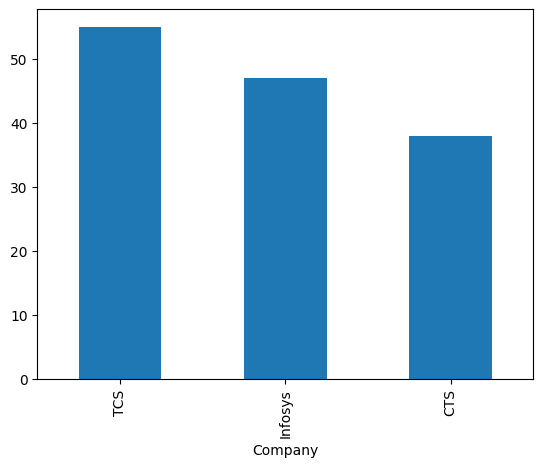

In [14]:
#show the value count graph
data['Company'].value_counts().plot(kind='bar')

In [15]:
#checking the value counts in place column
data['Place'].value_counts()

Place
Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

<Axes: ylabel='Place'>

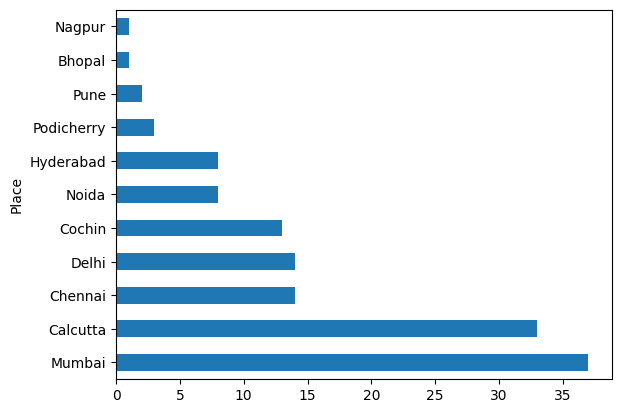

In [ ]:
#show the value count graph
data['Place'].value_counts().plot(kind='barh')

In [ ]:

#checking the value counts in salary column
data['Salary'].value_counts()

Salary
3000.0    9
5000.0    6
8202.0    5
5034.0    5
4034.0    5
2300.0    4
5835.0    4
8787.0    4
9024.0    4
2934.0    4
9284.0    4
8345.0    4
8943.0    4
7084.0    4
2034.0    4
4824.0    4
3045.0    4
3184.0    4
1234.0    4
1089.0    4
9000.0    3
6000.0    3
7000.0    3
8000.0    3
3030.0    3
4000.0    2
7654.0    2
9876.0    2
3234.0    2
5098.0    1
5009.0    1
5654.0    1
3454.0    1
4345.0    1
5555.0    1
5435.0    1
4324.0    1
6543.0    1
6544.0    1
3033.0    1
Name: count, dtype: int64

<Axes: xlabel='Salary'>

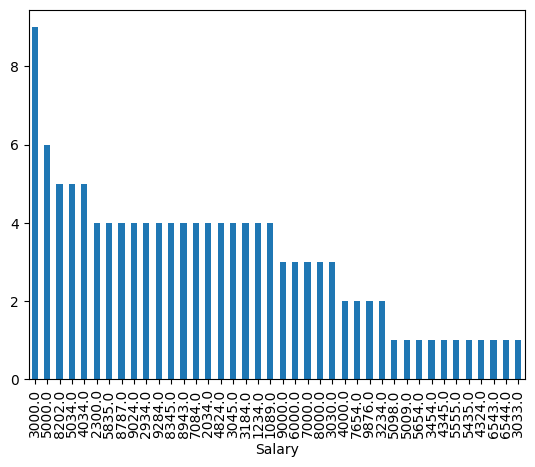

In [ ]:
#plot for salary graph
data['Salary'].value_counts().plot(kind='bar')

In [ ]:
#value counts in age column
data['Age'].value_counts()

Age
22.0    16
33.0    13
44.0    10
23.0     8
34.0     8
21.0     8
32.0     7
35.0     6
0.0      6
41.0     5
45.0     4
43.0     4
24.0     4
20.0     3
31.0     3
25.0     3
36.0     3
40.0     3
26.0     2
30.0     2
46.0     2
50.0     2
37.0     2
19.0     1
38.0     1
51.0     1
18.0     1
17.0     1
54.0     1
Name: count, dtype: int64

In [ ]:
#Replace the 0 value in age column to Nan
data['Age'].replace(0,np.nan,inplace=True)
data['Age'].value_counts()

Age
22.0    16
33.0    13
44.0    10
23.0     8
34.0     8
21.0     8
32.0     7
35.0     6
41.0     5
45.0     4
43.0     4
24.0     4
20.0     3
31.0     3
25.0     3
36.0     3
40.0     3
26.0     2
30.0     2
46.0     2
50.0     2
37.0     2
19.0     1
38.0     1
51.0     1
18.0     1
17.0     1
54.0     1
Name: count, dtype: int64

<Axes: xlabel='Age'>

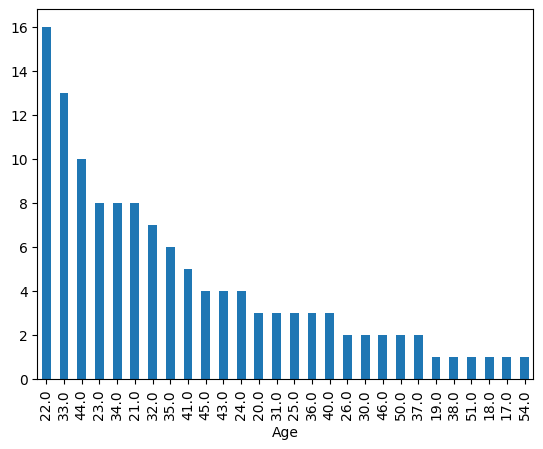

In [ ]:
#value count graph for Age column
data['Age'].value_counts().plot(kind='bar')

In [ ]:
#After replacing the 0 value to Nan, again showing the null value sum.
data.isna().sum()

Company     8
Age        24
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [ ]:
#it can see that in code no:11, the missing value calculation age has only 18 null values. Now its changed to 24 values. These missing vales
#will be treated in Step 5.

In [ ]:
#value counts in gender column
data['Gender'].value_counts()

Gender
0    115
1     33
Name: count, dtype: int64

In [16]:
#Here one column named country is more needed for the analysis becaues all the data were from India. So, we need to remove that column.
data.drop('Country',axis=1,inplace=True)
data.head()

,Company,Age,Salary,Place,Gender
0,TCS,20.0,NaN,Chennai,0
1,Infosys,30.0,NaN,Mumbai,0
2,TCS,35.0,2300.0,Calcutta,0
3,Infosys,40.0,3000.0,Delhi,0
4,TCS,23.0,4000.0,Mumbai,0


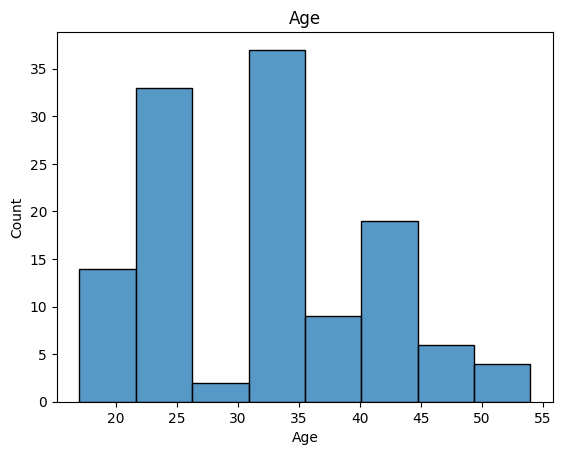

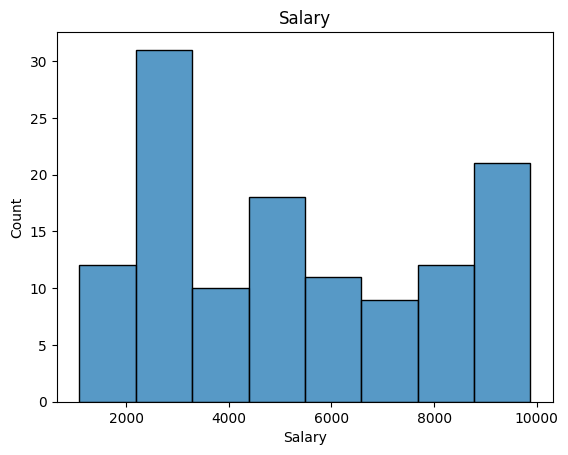

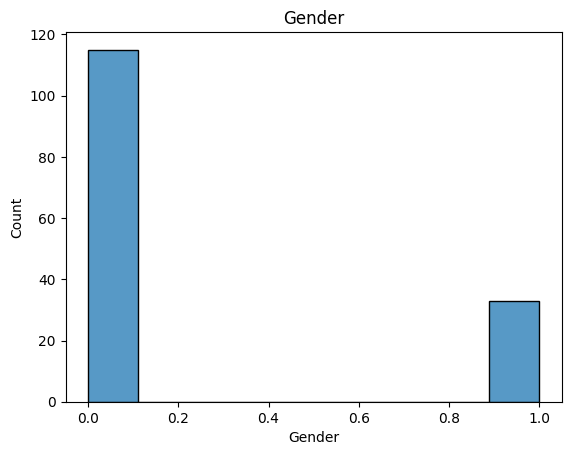

In [ ]:
#plot histogram to undrstand the distribution
#this step will help us to identify the distribution of data
for i in data.select_dtypes(include="number").columns:
  sns.histplot(data=data,x=i)
  plt.title(i)
  plt.show()

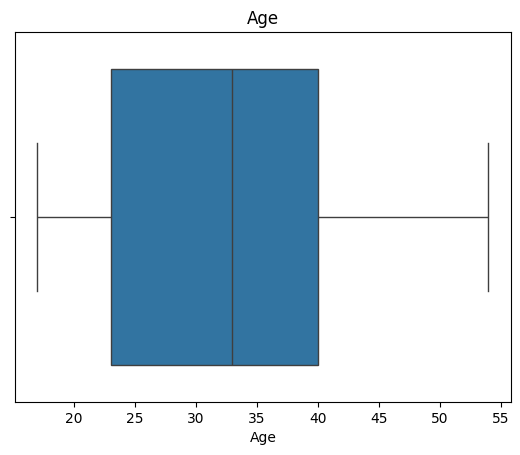

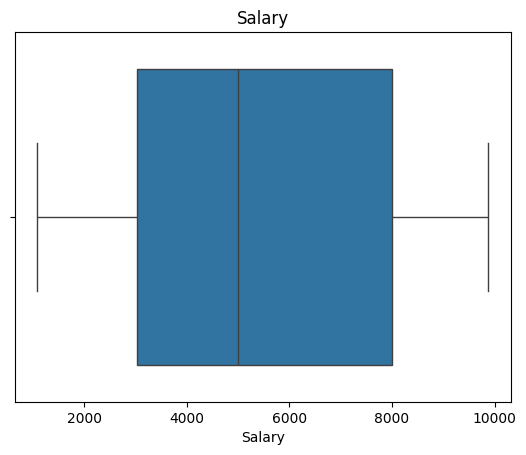

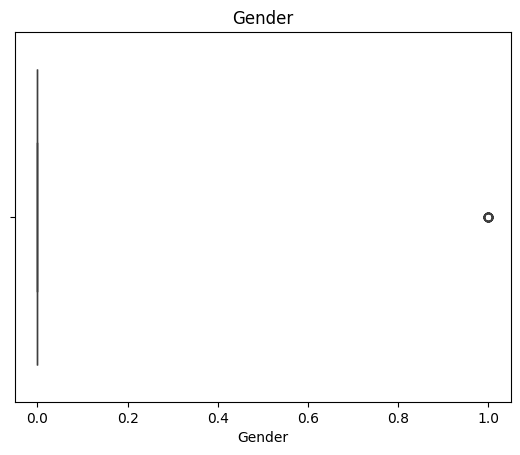

In [ ]:
#boxplot to findout  the outliers in the data
for i in data.select_dtypes(include="number").columns:
  sns.boxplot(data=data,x=i)
  plt.title(i)
  plt.show()

In [ ]:
#it shows that the three numerical column doesn't have any outliers.

<Axes: xlabel='Age', ylabel='Salary'>

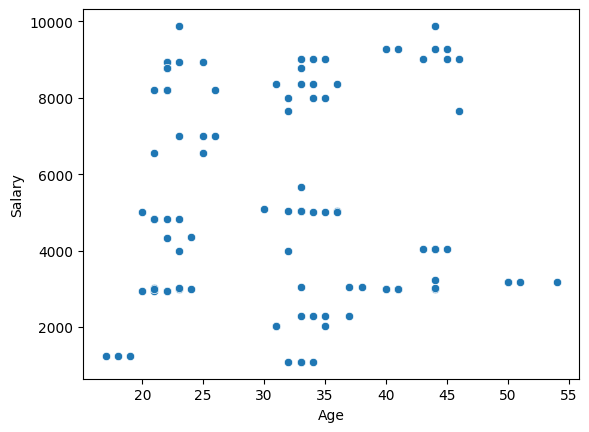

In [ ]:
#scatterplot to understand the relationship between Age and Salary
sns.scatterplot(data=data,x='Age',y='Salary')

<Axes: xlabel='Age', ylabel='Gender'>

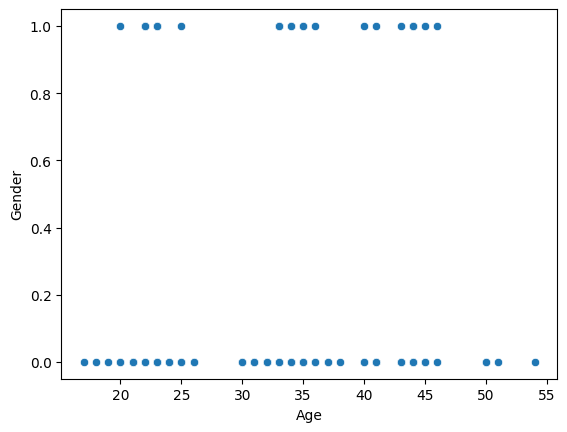

In [ ]:
#scatterplot to understand the relationship between Age and Salary
sns.scatterplot(data=data,x='Age',y='Gender')

<Axes: xlabel='Salary', ylabel='Gender'>

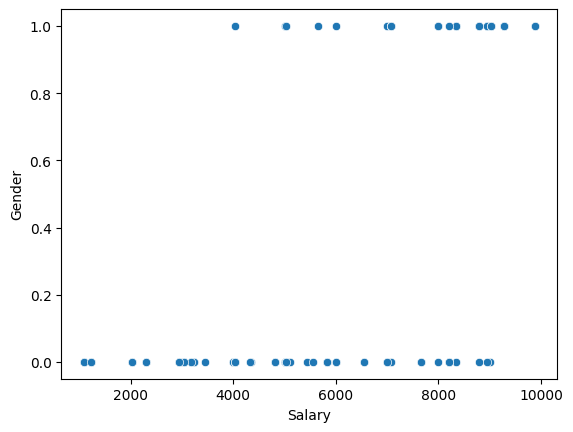

In [ ]:
#scatterplot to understand the relationship between Salary and Gender
sns.scatterplot(data=data,x='Salary',y='Gender')

In [ ]:
#show the numerical columns only
data.select_dtypes(include="number").columns

Index(['Age', 'Salary', 'Gender'], dtype='object')

In [ ]:
#findout the correlation between numerical columns
c = data.select_dtypes(include="number").corr()
c

,Age,Salary,Gender
Age,1.000000,-0.034928,0.058155
Salary,-0.034928,1.000000,0.655525
Gender,0.058155,0.655525,1.000000


<Axes: >

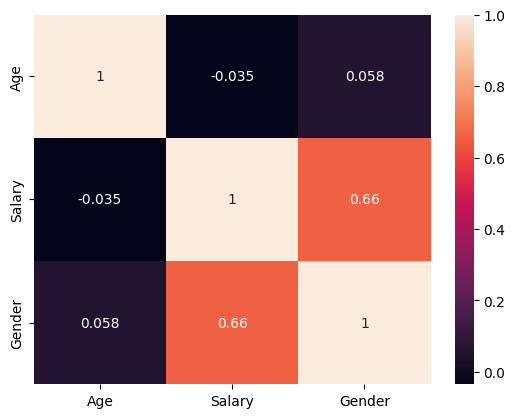

In [ ]:
#plot heatmap
sns.heatmap(c,annot=True)

Missing value Treatment

In [ ]:

#choose the method of imputing missing value
#like mean,median,mode
data.isnull().sum()

Company     8
Age        24
Salary     24
Place      14
Gender      0
dtype: int64

In [19]:
#for numerical column, we can replace the value with mean,median, mode. Here we using the mean function.
for i in ['Age', 'Salary']:
  data[i].fillna(data[i].mean(),inplace=True)

In [20]:
#checking the null values for numerical columns
data.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Gender     0
dtype: int64

In [17]:
#replacing the null values in categorical columns with mode function
for i in ['Company','Place','Gender']:
  data[i].fillna(data[i].mode()[0],inplace=True)

In [21]:
#checking the null values for categorical column
data.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Gender     0
dtype: int64

In [ ]:
data.head()

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5312.467742,Chennai,0
1,Infosys,30.0,5312.467742,Mumbai,0
2,TCS,35.0,2300.000000,Calcutta,0
3,Infosys,40.0,3000.000000,Delhi,0
4,TCS,23.0,4000.000000,Mumbai,0


In [ ]:
#now we got all null values removed
#once again checking the histogram and boxplot

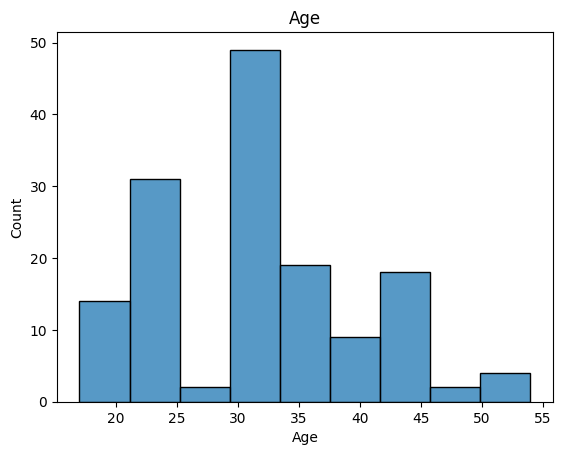

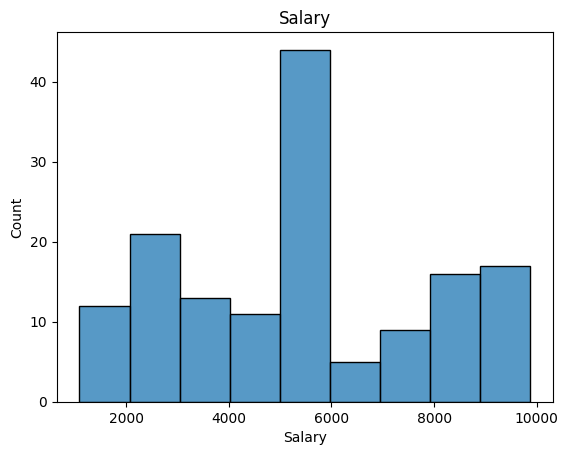

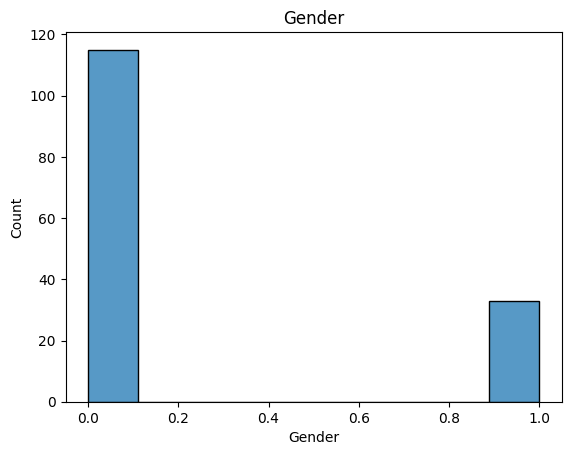

In [ ]:
for i in ["Age","Salary", "Gender"]:
  sns.histplot(data=data,x=i)
  plt.title(i)
  plt.show()

In [ ]:
#During the cleaning process, we treated all null value, replace column with identical names, replace one column name.
#removed one unwanted column named Country.
data.head()

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5312.467742,Chennai,0
1,Infosys,30.0,5312.467742,Mumbai,0
2,TCS,35.0,2300.000000,Calcutta,0
3,Infosys,40.0,3000.000000,Delhi,0
4,TCS,23.0,4000.000000,Mumbai,0


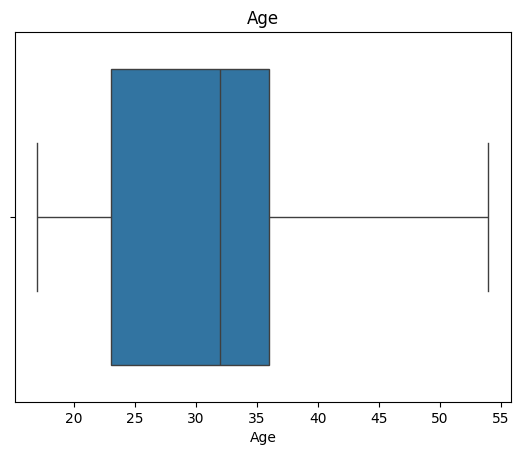

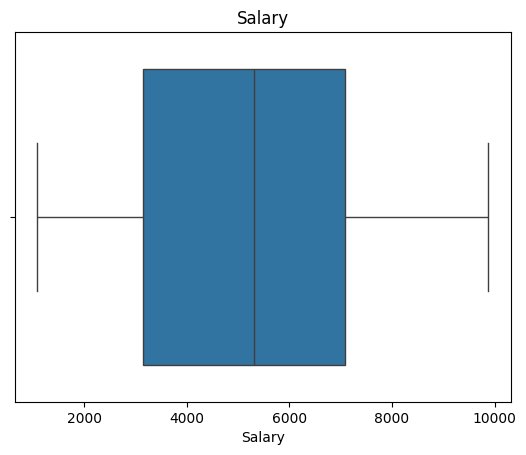

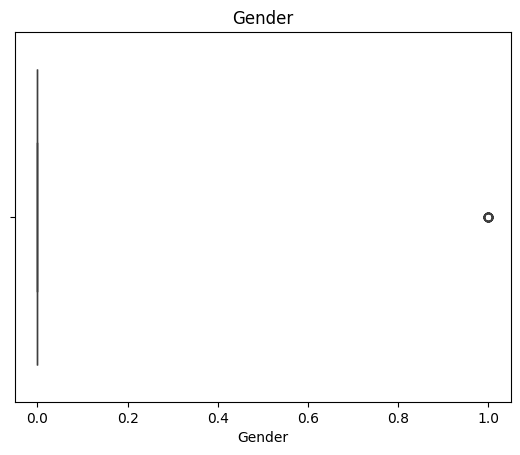

In [ ]:
#boxplot to findout  the outliers in the data
for i in data.select_dtypes(include="number").columns:
  sns.boxplot(data=data,x=i)
  plt.title(i)
  plt.show()

This data, by analysing the boxplot, there are no outliers present.
Doing some analysis questions asked in the question

In [ ]:
#Data Analysis:
#Filter the data with age >40 and salary<5000
#Plot the chart with age and salary
#Count the number of people from each place and represent it visually

In [ ]:
#1.Filter the data with age >40 and salary<5000
data[(data['Age']>40) & (data['Salary']<5000)]

,Company,Age,Salary,Place,Gender
21,Infosys,50.0,3184.0,Delhi,0
32,Infosys,45.0,4034.0,Calcutta,0
39,Infosys,41.0,3000.0,Mumbai,0
50,Infosys,41.0,3000.0,Chennai,0
57,Infosys,51.0,3184.0,Hyderabad,0
68,Infosys,43.0,4034.0,Mumbai,0
75,Infosys,44.0,3000.0,Cochin,0
86,Infosys,41.0,3000.0,Delhi,0
93,Infosys,54.0,3184.0,Mumbai,0
104,Infosys,44.0,4034.0,Delhi,0


<Axes: xlabel='Age', ylabel='Salary'>

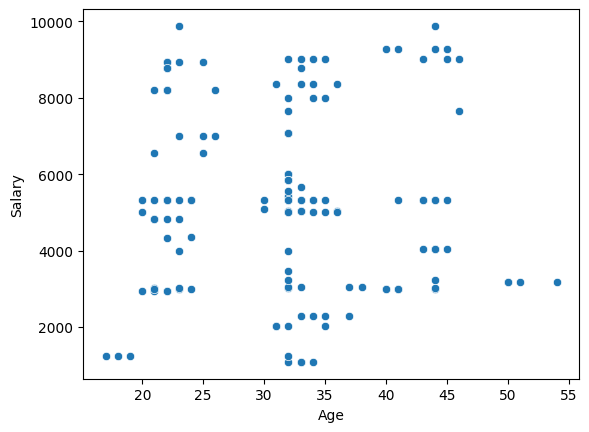

In [ ]:
#2.Plot the chart with age and salary
sns.scatterplot(data=data,x='Age',y='Salary')

<Axes: xlabel='Age', ylabel='Salary'>

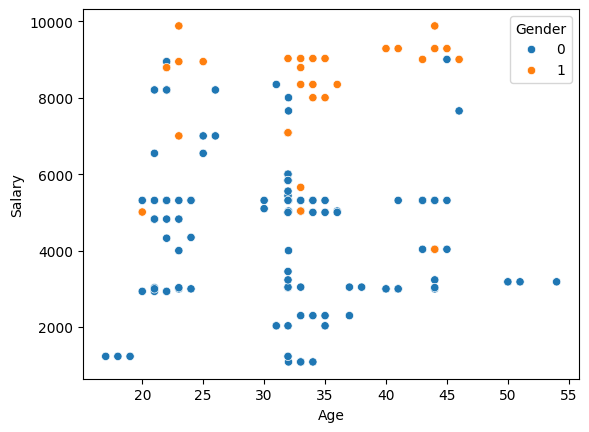

In [ ]:
#alternate graph
sns.scatterplot(data=data,x='Age',y='Salary',hue='Gender')

<Axes: xlabel='Place'>

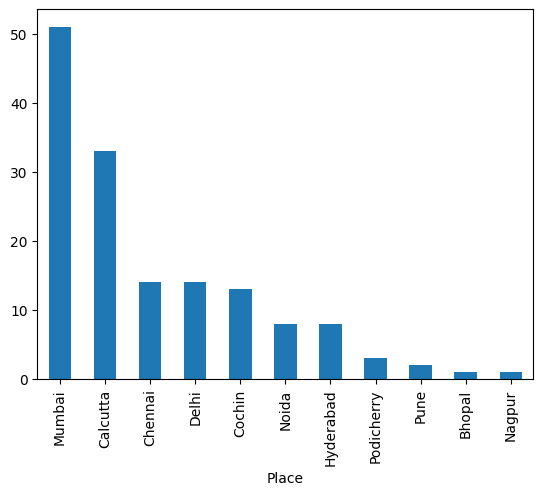

In [ ]:
#3.Count the number of people from each place and represent it visually
data['Place'].value_counts()
data['Place'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

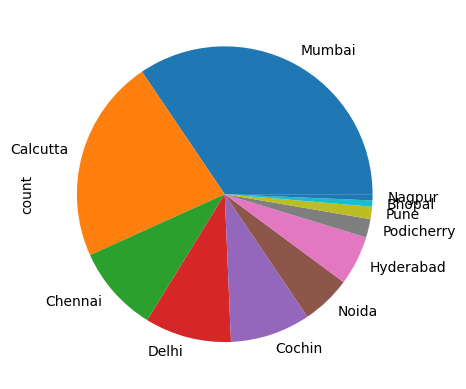

In [ ]:
#another method
data['Place'].value_counts().plot(kind='pie')

In [ ]:
data.head()

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5312.467742,Chennai,0
1,Infosys,30.0,5312.467742,Mumbai,0
2,TCS,35.0,2300.000000,Calcutta,0
3,Infosys,40.0,3000.000000,Delhi,0
4,TCS,23.0,4000.000000,Mumbai,0


Data Encoding using the pd.getdummies

In [ ]:
df= data.copy()

In [ ]:
pd.get_dummies(data = df, columns = ["Company", "Place","Gender"])

,Age,Salary,Company_CTS,Company_Congnizant,Company_Infosys,Company_TCS,Company_Tata,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Gender_0,Gender_1
0,20.0,5312.467742,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,30.0,5312.467742,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
2,35.0,2300.000000,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
3,40.0,3000.000000,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
4,23.0,4000.000000,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,33.0,9024.000000,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
144,22.0,8787.000000,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
145,44.0,4034.000000,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
146,33.0,5034.000000,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [ ]:
#Here,we transform the given data into data encoder using pd.getdummies.
#now, we have to do the feature scaling for two columns Age and Salary.


In [ ]:
data_new = data.copy()
#To create a new table with only Age and Salary column
data_new1 = data_new[['Age','Salary']]
data_new1

,Age,Salary
0,20.0,5312.467742
1,30.0,5312.467742
2,35.0,2300.000000
3,40.0,3000.000000
4,23.0,4000.000000
...,...,...
143,33.0,9024.000000
144,22.0,8787.000000
145,44.0,4034.000000
146,33.0,5034.000000


Minmax Scaling

MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

```

```



In [ ]:
#now do the minmax scaling for data_new1 dataset
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data_new1_scaled = mm.fit_transform(data_new1)
data_new1_scaled

array([[0.08108108, 0.48064957],
       [0.35135135, 0.48064957],
       [0.48648649, 0.13781723],
       [0.62162162, 0.21748037],
       [0.16216216, 0.33128485],
       [0.40431561, 0.44508934],
       [0.40431561, 0.55889382],
       [0.16216216, 0.6726983 ],
       [0.45945946, 0.78650279],
       [0.75675676, 0.90030727],
       [0.16216216, 0.48064957],
       [0.45945946, 0.        ],
       [0.75675676, 0.48064957],
       [0.02702703, 0.01650165],
       [0.62162162, 0.21748037],
       [0.16216216, 0.21748037],
       [0.16216216, 0.2208945 ],
       [0.45945946, 0.44508934],
       [0.13513514, 0.48064957],
       [0.40540541, 0.48064957],
       [0.54054054, 0.22260157],
       [0.89189189, 0.23842039],
       [0.10810811, 0.42505975],
       [0.40431561, 0.54011608],
       [0.40431561, 0.68225788],
       [0.16216216, 0.89382042],
       [0.45945946, 0.82576534],
       [0.75675676, 0.93262775],
       [0.16216216, 1.        ],
       [0.48648649, 0.10754524],
       [0.

Standard Scaling

In [ ]:
#perform the Standard scaling for data_new1 dataset
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_new1_scaled = ss.fit_transform(data_new1)
data_new1_scaled

array([[-1.45214324e+00,  0.00000000e+00],
       [-2.37943902e-01,  0.00000000e+00],
       [ 3.69155766e-01, -1.28390198e+00],
       [ 9.76255435e-01, -9.85564718e-01],
       [-1.08788344e+00, -5.59368625e-01],
       [-4.31370260e-16, -1.33172531e-01],
       [-4.31370260e-16,  2.93023563e-01],
       [-1.08788344e+00,  7.19219656e-01],
       [ 2.47735833e-01,  1.14541575e+00],
       [ 1.58335510e+00,  1.57161184e+00],
       [-1.08788344e+00,  0.00000000e+00],
       [ 2.47735833e-01, -1.80002545e+00],
       [ 1.58335510e+00,  0.00000000e+00],
       [-1.69498311e+00, -1.73822702e+00],
       [ 9.76255435e-01, -9.85564718e-01],
       [-1.08788344e+00, -9.85564718e-01],
       [-1.08788344e+00, -9.72778836e-01],
       [ 2.47735833e-01, -1.33172531e-01],
       [-1.20930337e+00,  0.00000000e+00],
       [ 4.89596507e-03,  0.00000000e+00],
       [ 6.11995634e-01, -9.66385894e-01],
       [ 2.19045477e+00, -9.07144637e-01],
       [-1.33072331e+00, -2.08183043e-01],
       [-4.

In [ ]:
#This data can be tranformed to X and y test data and training data by putting Salary as the Target variable.
 #But for the time being, i have create minmax scaling and Standard scaling using salary and age column.
